In [ ]:
pip install keras-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
pip install matplotlib

In [ ]:
pip install opencv-python

In [ ]:
pip install pdf2image

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pdf2image import convert_from_path

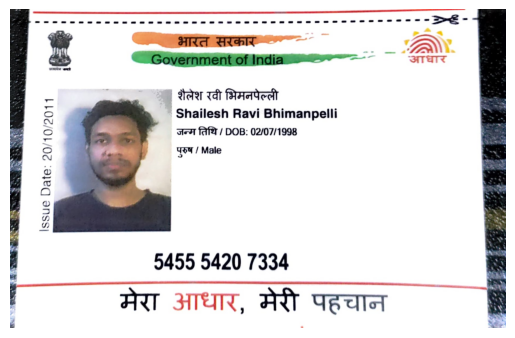

In [ ]:
# load image
doc_img = cv2.imread("./aadhar.jpg")
doc_img = cv2.cvtColor(doc_img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(doc_img)
plt.axis("off")
plt.show()

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

# Read images
images = [keras_ocr.tools.read(img) for img in ['./aadhar.jpg']]

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 9s 9s/step
[<Axes: >]


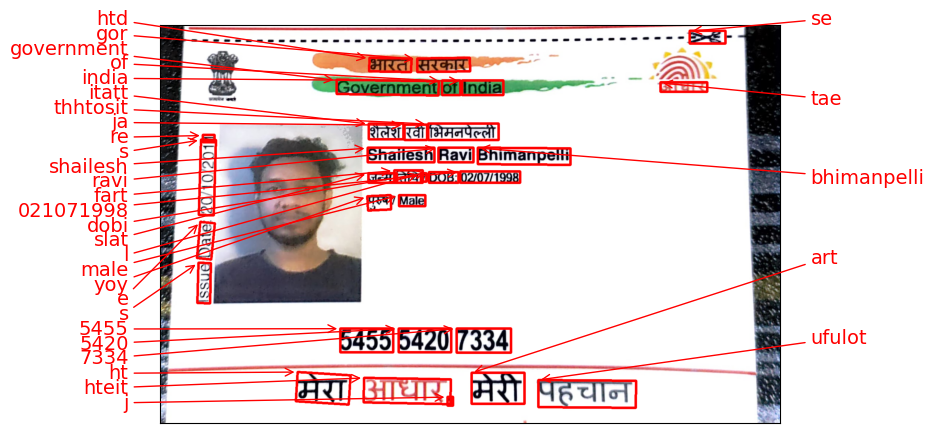

In [ ]:
# generate text prediction from images
prediction_groups = pipeline.recognize(images)

# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(8, 6))

# Ensure axs is always iterable
axs = np.atleast_1d(axs)
print(axs)

for ax, image, predictions in zip(axs, images, prediction_groups):
  keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 13.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

In [ ]:
import easyocr

In [ ]:
img_path = './aadhar.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result

[([[1443, 15], [1575, 15], [1575, 57], [1443, 57]],
  '3& -',
  0.49600285291671753),
 ([[567, 87], [852, 87], [852, 136], [567, 136]],
  'HTT HTT',
  0.3183474122048129),
 ([[479, 147], [944, 147], [944, 199], [479, 199]],
  'Government of India',
  0.9597668122036935),
 ([[1363, 155], [1503, 155], [1503, 191], [1363, 191]],
  '3err',
  0.2818682453390986),
 ([[567, 264], [931, 264], [931, 324], [567, 324]],
  '9tater Tail fa[aycalt',
  0.03774201470413248),
 ([[562, 332], [1128, 332], [1128, 388], [562, 388]],
  'Shailesh Ravi Bhimanpelli',
  0.6785000032033438),
 ([[100, 296], [156, 296], [156, 526], [100, 526]], '1', 0.8074718587342886),
 ([[567, 397], [717, 397], [717, 439], [567, 439]],
  'J7Tfr',
  0.3830703797630349),
 ([[735, 401], [991, 401], [991, 439], [735, 439]],
  'DOB: 02/07/1998',
  0.888443074186903),
 ([[567, 469], [633, 469], [633, 513], [567, 513]], '554', 0.3078938002743612),
 ([[654, 468], [730, 468], [730, 500], [654, 500]],
  'Male',
  0.9999882578849792),
 ([[

In [ ]:
confidence_threshold = 0.60
filtered_text = "" # initialize an empty string to store filtered text

for text in result:
  bounding_box, recognized_text, confidence = text
  if confidence >= confidence_threshold:
    filtered_text += recognized_text + "|"

In [ ]:
filtered_text

'Government of India|Shailesh Ravi Bhimanpelli|1|DOB: 02/07/1998|Male|5455 5420 7334|'